In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mean Squared Error: 4.4461720679662974e-05
R2 Score: 0.9905160381133722


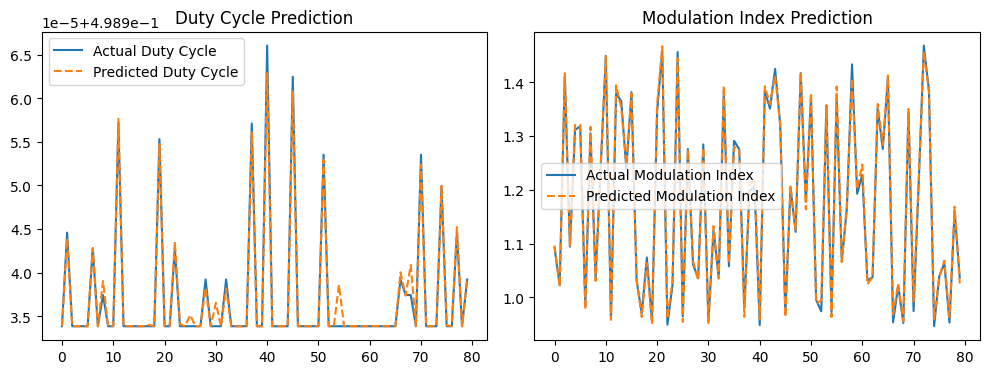

In [10]:
# Step 1: Install necessary packages (only if not installed)
# !pip install scikit-learn pandas matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load your dataset
# Replace this with your actual CSV
# df = pd.read_csv("your_dataset.csv")
df = pd.read_excel("/content/drive/My Drive/datasets/pvdataset.xlsx")
# Example synthetic dataset (replace this with your actual one)
# df = pd.DataFrame({
#     'Irradiance': [200, 400, 600, 800, 1000],
#     'Temperature': [10, 20, 30, 40, 50],
#     'Vdc': [300, 320, 340, 360, 380],
#     'Duty_Cycle': [0.3, 0.35, 0.4, 0.45, 0.5],
#     'Modulation_Index': [0.6, 0.65, 0.7, 0.75, 0.8]
# })

# Step 3: Separate features and targets
X = df[['Irradiation', 'Temperature']]
y = df[['Duty_Cycle', 'Mod_Idx']]

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Optional: Visualize predictions vs actual
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(y_test['Duty_Cycle'].values, label='Actual Duty Cycle')
plt.plot(y_pred[:, 0], label='Predicted Duty Cycle', linestyle='--')
plt.legend()
plt.title('Duty Cycle Prediction')

plt.subplot(1, 2, 2)
plt.plot(y_test['Mod_Idx'].values, label='Actual Modulation Index')
plt.plot(y_pred[:, 1], label='Predicted Modulation Index', linestyle='--')
plt.legend()
plt.title('Modulation Index Prediction')

plt.tight_layout()
plt.show()


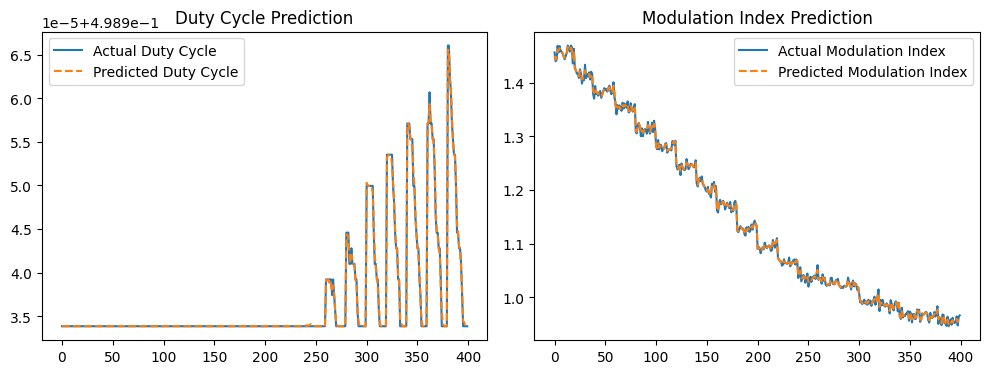

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample data (replace with real CSV)
df = pd.read_excel("/content/drive/My Drive/datasets/pvdataset.xlsx")

X = df[['Irradiation', 'Temperature']]
y = df[['Duty_Cycle', 'Mod_Idx']]

# Train on all data (not ideal, but for demonstration)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# Plot predictions
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(y['Duty_Cycle'].values, label='Actual Duty Cycle')
plt.plot(y_pred[:, 0], '--', label='Predicted Duty Cycle')
plt.legend()
plt.title('Duty Cycle Prediction')

plt.subplot(1, 2, 2)
plt.plot(y['Mod_Idx'].values, label='Actual Modulation Index')
plt.plot(y_pred[:, 1], '--', label='Predicted Modulation Index')
plt.legend()
plt.title('Modulation Index Prediction')

plt.tight_layout()
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Model Performance:
Mean Squared Error: 4.390888789863438e-05
Mean Absolute Error: 0.0038237704820930957
R2 Score: 0.9907256152061069


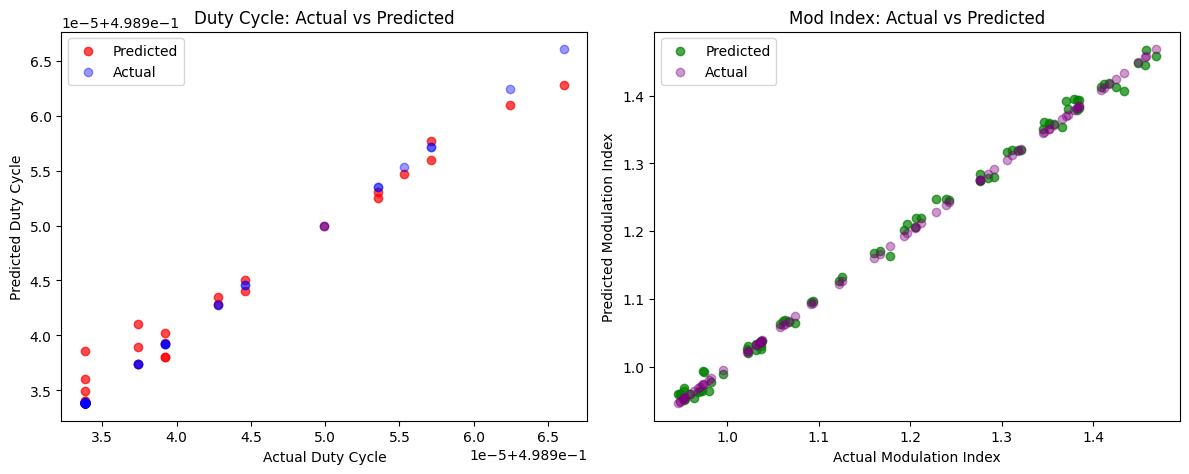

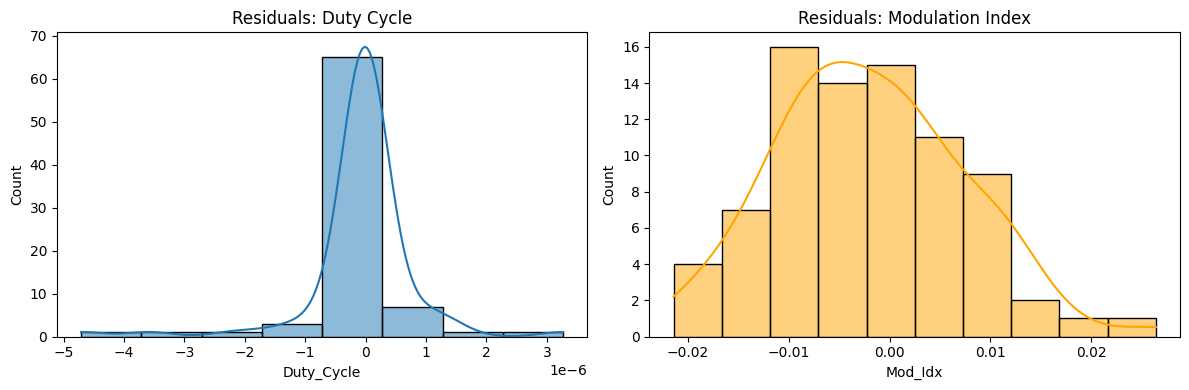

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load dataset
df = pd.read_excel("/content/drive/My Drive/datasets/pvdataset.xlsx")  # or use .csv and read_csv()

# ✅ Features (Inputs) and Targets (Outputs)
X = df[['Irradiation', 'Temperature']]
y = df[['Duty_Cycle', 'Mod_Idx']]

# 📊 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 🔮 Predict
y_pred = model.predict(X_test)

# 📈 Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# 📉 Plot Actual vs Predicted (Scatter)
plt.figure(figsize=(12, 5))

# Duty Cycle
plt.subplot(1, 2, 1)
plt.scatter(y_test['Duty_Cycle'], y_pred[:, 0], alpha=0.7, color='red', label='Predicted')
plt.scatter(y_test['Duty_Cycle'], y_test['Duty_Cycle'], alpha=0.4, color='blue', label='Actual')
plt.xlabel('Actual Duty Cycle')
plt.ylabel('Predicted Duty Cycle')
plt.title('Duty Cycle: Actual vs Predicted')
plt.legend()

# Modulation Index
plt.subplot(1, 2, 2)
plt.scatter(y_test['Mod_Idx'], y_pred[:, 1], alpha=0.7, color='green', label='Predicted')
plt.scatter(y_test['Mod_Idx'], y_test['Mod_Idx'], alpha=0.4, color='purple', label='Actual')
plt.xlabel('Actual Modulation Index')
plt.ylabel('Predicted Modulation Index')
plt.title('Mod Index: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# 📊 Residual Histogram
residuals_duty = y_test['Duty_Cycle'] - y_pred[:, 0]
residuals_mod = y_test['Mod_Idx'] - y_pred[:, 1]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals_duty, kde=True)
plt.title('Residuals: Duty Cycle')

plt.subplot(1, 2, 2)
sns.histplot(residuals_mod, kde=True, color='orange')
plt.title('Residuals: Modulation Index')
plt.tight_layout()
plt.show()


✅ Model Performance:
Mean Squared Error (MSE): 4.390888789863438e-05
Mean Absolute Error (MAE): 0.0038237704820930957
R2 Score: 0.9907256152061069


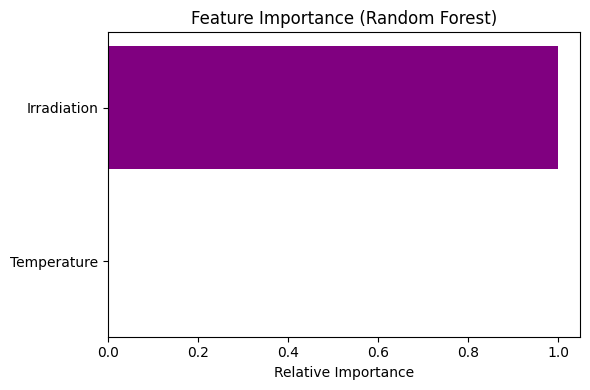

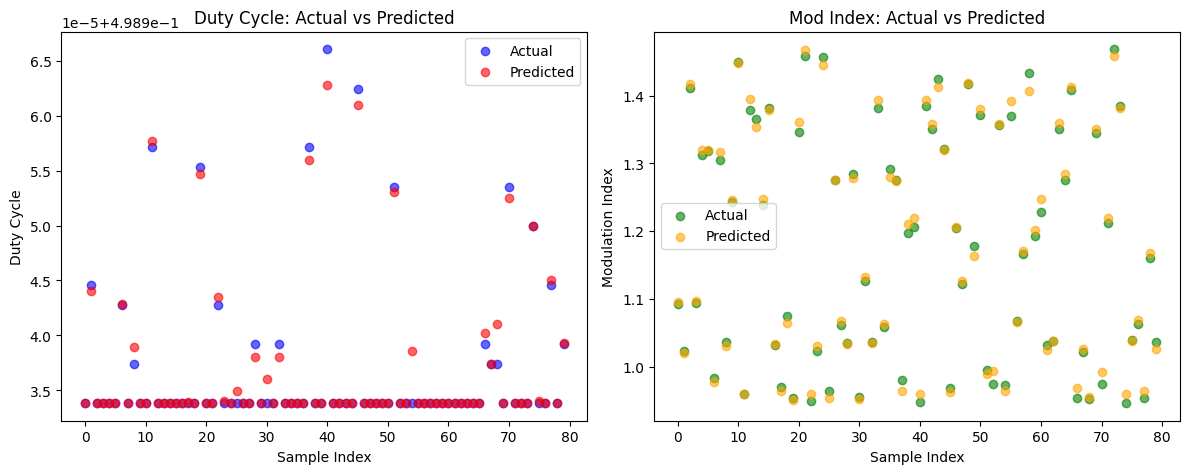

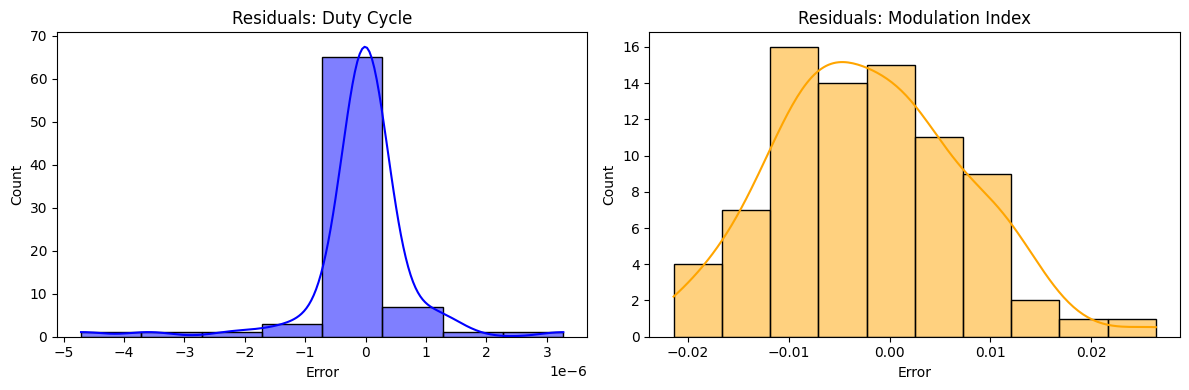

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📥 Load dataset
df = pd.read_excel("/content/drive/My Drive/datasets/pvdataset.xlsx")  # Use read_csv() if your file is CSV

# ✅ Features and Targets
X = df[['Irradiation', 'Temperature']]
y = df[['Duty_Cycle', 'Mod_Idx']]

# 📊 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Train Random Forest Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 🔮 Predictions
y_pred = model.predict(X_test)

# 📈 Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

# 📊 Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(6, 4))
plt.title('Feature Importance (Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='purple')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

# 📈 Actual vs Predicted Scatter Plots
plt.figure(figsize=(12, 5))

# Duty Cycle
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test['Duty_Cycle'], label='Actual', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred[:, 0], label='Predicted', color='red', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Duty Cycle')
plt.title('Duty Cycle: Actual vs Predicted')
plt.legend()

# Modulation Index
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test['Mod_Idx'], label='Actual', color='green', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred[:, 1], label='Predicted', color='orange', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Modulation Index')
plt.title('Mod Index: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# 📉 Residual Histograms
residuals_duty = y_test['Duty_Cycle'].values - y_pred[:, 0]
residuals_mod = y_test['Mod_Idx'].values - y_pred[:, 1]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals_duty, kde=True, color='blue')
plt.title('Residuals: Duty Cycle')
plt.xlabel('Error')

plt.subplot(1, 2, 2)
sns.histplot(residuals_mod, kde=True, color='orange')
plt.title('Residuals: Modulation Index')
plt.xlabel('Error')

plt.tight_layout()
plt.show()


✅ Model Performance:
Mean Squared Error (MSE): 0.000044
Mean Absolute Error (MAE): 0.003824
R2 Score: 0.9907


<ipython-input-5-4ea2d6632ed3>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


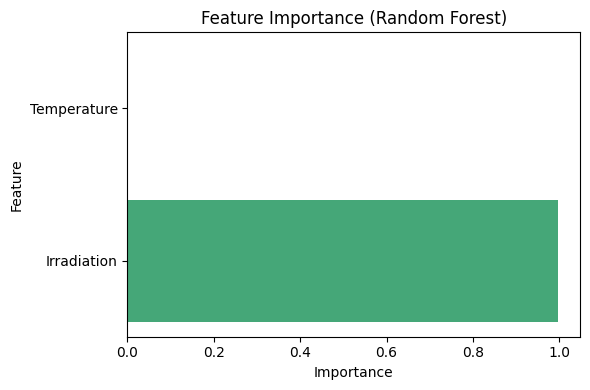

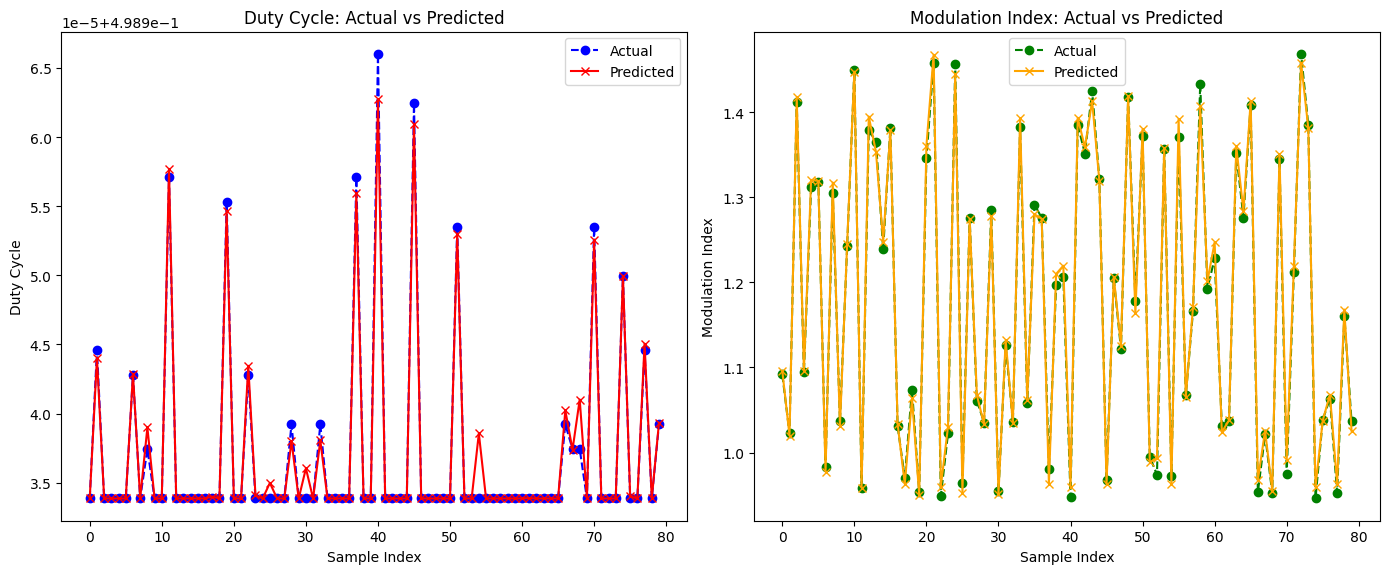

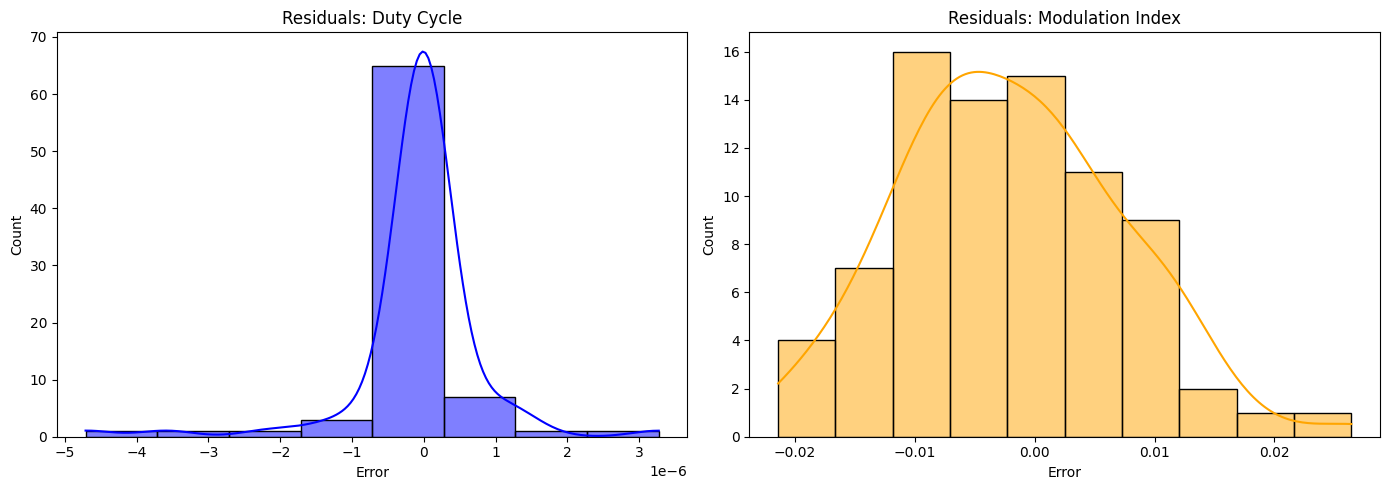

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 1. Load Dataset ===
df = pd.read_excel("/content/drive/My Drive/datasets/pvdataset.xlsx")  # ← You’re running this locally, use your actual path

# === 2. Features & Targets ===
X = df[['Irradiation', 'Temperature']]
y = df[['Duty_Cycle', 'Mod_Idx']]

# === 3. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Train Random Forest ===
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# === 5. Predict ===
y_pred = model.predict(X_test)

# === 6. Evaluation Metrics ===
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R2 Score: {r2:.4f}")

# === 7. Feature Importance ===
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# === 8. Actual vs Predicted Scatter ===
plt.figure(figsize=(14, 6))

# Duty Cycle
plt.subplot(1, 2, 1)
plt.plot(y_test['Duty_Cycle'].values, label='Actual', color='blue', linestyle='--', marker='o')
plt.plot(y_pred[:, 0], label='Predicted', color='red', linestyle='-', marker='x')
plt.title("Duty Cycle: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Duty Cycle")
plt.legend()

# Modulation Index
plt.subplot(1, 2, 2)
plt.plot(y_test['Mod_Idx'].values, label='Actual', color='green', linestyle='--', marker='o')
plt.plot(y_pred[:, 1], label='Predicted', color='orange', linestyle='-', marker='x')
plt.title("Modulation Index: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Modulation Index")
plt.legend()

plt.tight_layout()
plt.show()

# === 9. Residual Histograms ===
residuals_duty = y_test['Duty_Cycle'].values - y_pred[:, 0]
residuals_mod = y_test['Mod_Idx'].values - y_pred[:, 1]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_duty, kde=True, color='blue')
plt.title("Residuals: Duty Cycle")
plt.xlabel("Error")

plt.subplot(1, 2, 2)
sns.histplot(residuals_mod, kde=True, color='orange')
plt.title("Residuals: Modulation Index")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


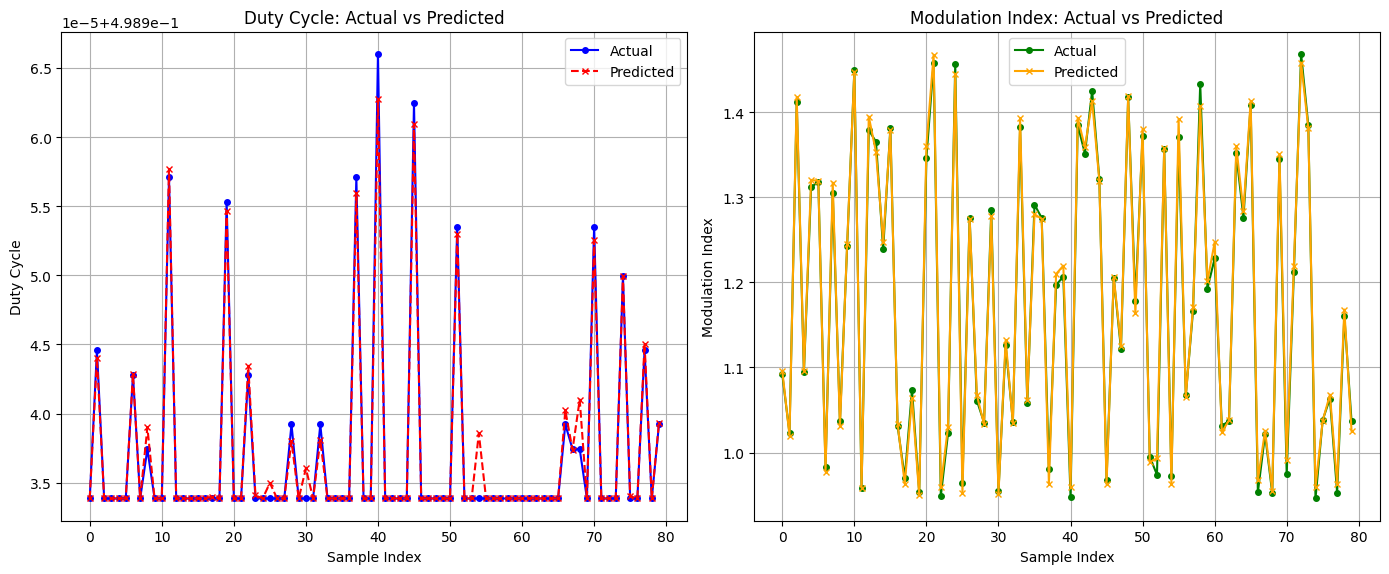

In [6]:
# 📈 Actual vs Predicted Scatter Plots (with clearer markers)
plt.figure(figsize=(14, 6))

# Duty Cycle
plt.subplot(1, 2, 1)
plt.plot(y_test['Duty_Cycle'].values, label='Actual', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(y_pred[:, 0], label='Predicted', color='red', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Duty Cycle')
plt.title('Duty Cycle: Actual vs Predicted')
plt.legend()
plt.grid(True)

# Modulation Index
plt.subplot(1, 2, 2)
plt.plot(y_test['Mod_Idx'].values, label='Actual', color='green', linestyle='-', marker='o', markersize=4)
plt.plot(y_pred[:, 1], label='Predicted', color='orange', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Modulation Index')
plt.title('Modulation Index: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
